## <font color='blue'>Introdução a Deep Learning com TensorFlow</font>

Problema de Negócio:

Construir um modelo de Inteligência Artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.4


In [2]:
%pip install -q tensorflow==2.12

Note: you may need to restart the kernel to use updated packages.


In [3]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [4]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [5]:
print(tf.__version__)
print(tf.__path__)

2.12.0
['c:\\Users\\felip\\data scients - Python\\venv\\Lib\\site-packages\\keras\\api\\_v2', 'c:\\Users\\felip\\data scients - Python\\venv\\Lib\\site-packages\\tensorflow_estimator\\python\\estimator\\api\\_v2', 'c:\\Users\\felip\\data scients - Python\\venv\\Lib\\site-packages\\tensorboard\\summary\\_tf', 'c:\\Users\\felip\\data scients - Python\\venv\\Lib\\site-packages\\tensorflow', 'c:\\Users\\felip\\data scients - Python\\venv\\Lib\\site-packages\\tensorflow\\_api\\v2']


## Carregando os Dados

https://www.cs.toronto.edu/~kriz/cifar.html

In [9]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [13]:
# Nome das Classes
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'beer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Pré-Processamento e Visualização das Imagens

In [14]:
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [18]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

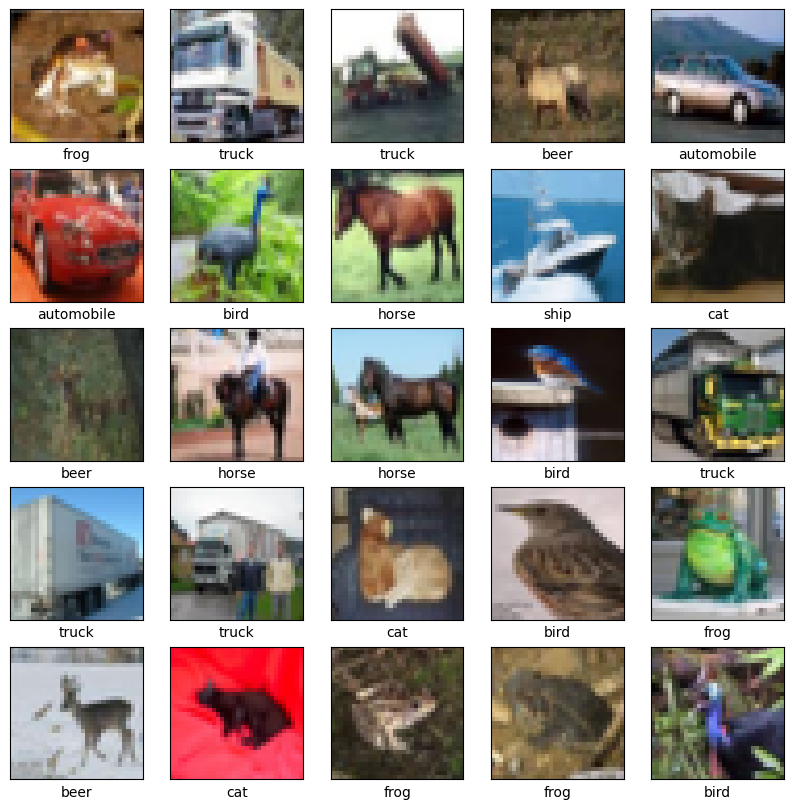

In [20]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

In [22]:
# Modelo

# Cria o objeto de sequência de camadas
modelo_dsa = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

In [23]:
# Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64, activation = 'relu'))
modelo_dsa.add(layers.Dense(10, activation = 'softmax'))

In [24]:
modelo_dsa.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)        

In [25]:
modelo_dsa.compile(optimizer= 'adam', 
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

In [28]:
%%time
history = modelo_dsa.fit(imagens_treino, 
                         labels_treino, 
                         epochs = 10, 
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0648 - accuracy: 0.6267 - val_loss: 1.0271 - val_accuracy: 0.6413
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9643 - accuracy: 0.6626 - val_loss: 1.0161 - val_accuracy: 0.6446
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8980 - accuracy: 0.6877 - val_loss: 0.9944 - val_accuracy: 0.6599
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8419 - accuracy: 0.7060 - val_loss: 0.9355 - val_accuracy: 0.6765
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7926 - accuracy: 0.7236 - val_loss: 0.9142 - val_accuracy: 0.6885
Epoch 6/10
1563/1563 [==============================] - 187s 120ms/step - loss: 0.7534 - accuracy: 0.7380 - val_loss: 0.8641 - val_accuracy: 0.7025
Epoch 7/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7140 - accuracy: 0.7502 - val_loss: 0.857

## Avaliação do Modelo

In [29]:
erro_teste, acc_teste = modelo_dsa.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 5s - loss: 0.8846 - accuracy: 0.7082 - 5s/epoch - 17ms/step


In [30]:
print('\nAcurancia com dados de teste: ', acc_teste)


Acurancia com dados de teste:  0.7081999778747559


## Deploy do Modelo


In [31]:
nova_imagem = Image.open("dados/nova_imagem.jpg")

In [32]:
nova_imagem.size

(1919, 1199)

In [33]:
largura = nova_imagem.width
altura = nova_imagem.height

In [34]:
print("A largura da imagem é: ", largura)
print("A altura da imagem é: ", altura)

A largura da imagem é:  1919
A altura da imagem é:  1199


In [35]:
nova_imagem = nova_imagem.resize((32, 32))

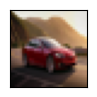

In [37]:
# Exibir nova imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
nova_imagem_array = np.array(nova_imagem) / 255.0

In [39]:
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [40]:
previsoes = modelo_dsa.predict(nova_imagem_array)

1/1 [==============================] - 1s 1s/step


In [41]:
print(previsoes)

[[1.1392485e-03 9.6966839e-01 4.1485609e-06 2.2595270e-06 1.5981250e-07
  3.7281464e-07 6.2732775e-05 3.0725434e-06 1.2712721e-03 2.7848322e-02]]


In [43]:
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [44]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: automobile
